In [32]:
import math
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Union
from collections import Counter

In [33]:
class Combinatoria:
    def __init__(self):
        pass

    def fatorial(self, n: int) -> int:
        """Calcula o fatorial de um número de forma iterativa."""
        resultado = 1
        for i in range(2, n + 1):
            resultado *= i
        return resultado

    def permutacao(self, n: int, k: int) -> int:
        """Calcula a permutação de n elementos tomados k a k."""
        return self.fatorial(n) // self.fatorial(n - k)
    
    def combinacao(self, n: int, k: int) -> int:
        """Calcula a combinação de n elementos tomados k a k."""
        return self.fatorial(n) // (self.fatorial(k) * self.fatorial(n - k))
    
    def arranjo(self, n: int, k: int) -> int:
        """Calcula o arranjo de n elementos tomados k a k."""
        return self.permutacao(n, k)
    
    def permutacao_com_repeticao(self, n: int, repeticoes: List[int]) -> int:
        """Calcula a permutação com repetição."""
        denominador = 1
        for r in repeticoes:
            denominador *= self.fatorial(r)
        return self.fatorial(n) // denominador

In [34]:
class Probabilidade:
    def __init__(self):
        pass

    def prob_evento(self, n_eventos_favoraveis: int, n_total_eventos: int) -> float:
        """Calcula a probabilidade de um evento."""
        return n_eventos_favoraveis / n_total_eventos

    def prob_complementar(self, prob_evento: float) -> float:
        """Calcula a probabilidade complementar."""
        return 1 - prob_evento

    def prob_condicional(self, prob_A: float, prob_B: float, prob_intersecao_AB: float) -> float:
        """Calcula a probabilidade condicional."""
        return prob_intersecao_AB / prob_B

    def prob_uniao(self, prob_A: float, prob_B: float, prob_intersecao_AB: Union[float, None] = None) -> float:
        """Calcula a probabilidade da união de dois eventos."""
        if prob_intersecao_AB is None:
            return prob_A + prob_B
        return prob_A + prob_B - prob_intersecao_AB
    
    def prob_independente(self, prob_eventos: List[float]) -> float:
        """Calcula a probabilidade de eventos independentes."""
        resultado = 1
        for prob in prob_eventos:
            resultado *= prob
        return resultado
    
    def prob_binomial(self, n: int, k: int, prob_sucesso: float) -> float:
        """Calcula a probabilidade binomial."""
        combinatoria = Combinatoria().combinacao(n, k)
        return combinatoria * (prob_sucesso ** k) * ((1 - prob_sucesso) ** (n - k))
    
    def probabilidade_nao_equiprovavel(self, eventos_favoraveis: List[float], espaco_amostral: List[float]) -> float:
        """Calcula a probabilidade para eventos não equiprováveis."""
        return sum(eventos_favoraveis) / sum(espaco_amostral)

In [35]:
class Teoremas:
    def __init__(self):
        pass
    
    def teorema_probabilidade_total(self, probs_eventos: List[float], probs_condicionais: List[float]) -> float:
        """Calcula a probabilidade total usando o teorema da probabilidade total."""
        return sum([prob_evento * prob_condicional for prob_evento, prob_condicional in zip(probs_eventos, probs_condicionais)])
    
    def teorema_bayes(self, prob_A_dado_B: float, prob_B: float, prob_A: float) -> float:
        """Calcula a probabilidade usando o teorema de Bayes."""
        return (prob_A_dado_B * prob_B) / prob_A
    
    def teorema_bayes_expandido(self, probs_A: List[float], probs_B_dado_A: List[float], prob_B: float) -> List[float]:
        """Calcula as probabilidades a posteriori usando o teorema de Bayes expandido."""
        return [(probs_B_dado_A[i] * probs_A[i]) / prob_B for i in range(len(probs_A))]

In [36]:
class MedidasDispersao:
    def __init__(self):
        pass
    
    def valor_esperado(self, valores: List[float], probabilidades: List[float]) -> float:
        """Calcula o valor esperado de uma variável aleatória."""
        return sum([valor * prob for valor, prob in zip(valores, probabilidades)])

    def variancia(self, valores: List[float], probabilidades: List[float]) -> float:
        """Calcula a variância de uma variável aleatória."""
        valor_esperado_val = self.valor_esperado(valores, probabilidades)
        return sum([((valor - valor_esperado_val) ** 2) * prob for valor, prob in zip(valores, probabilidades)])

    def desvio_padrao(self, valores: List[float], probabilidades: List[float]) -> float:
        """Calcula o desvio padrão de uma variável aleatória."""
        return self.variancia(valores, probabilidades) ** 0.5

In [37]:
class Distribuicoes:
    def __init__(self):
        pass
    
    def distribuicao_uniforme_discreta(self, valores: List[int]) -> List[float]:
        """Calcula a distribuição uniforme discreta."""
        n = len(valores)
        prob = 1 / n
        return [prob for _ in valores]
    
    def distribuicao_bernoulli(self, p: float) -> List[float]:
        """Calcula a distribuição de Bernoulli."""
        return [1 - p, p]
    
    def distribuicao_binomial(self, n: int, p: float, k: int) -> float:
        """Calcula a distribuição binomial."""
        combinatoria = Combinatoria().combinacao(n, k)
        return combinatoria * (p ** k) * ((1 - p) ** (n - k))
    
    def distribuicao_poisson(self, lmbda: float, k: int) -> float:
        """Calcula a distribuição de Poisson."""
        return (math.exp(-lmbda) * (lmbda ** k)) / math.factorial(k)
    
    def distribuicao_normal(self, x: float, mu: float, sigma: float) -> float:
        """Calcula a distribuição normal."""
        return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

In [38]:
class GraficosDistribuicao:
    def __init__(self):
        self.distribuicoes = Distribuicoes()

    def plot_distribuicao_binomial(self, n: int, p: float):
        """Plota a distribuição binomial."""
        k_values = np.arange(0, n + 1)
        prob_values = [self.distribuicoes.distribuicao_binomial(n, p, k) for k in k_values]

        plt.bar(k_values, prob_values, color='skyblue')
        plt.title(f'Distribuição Binomial (n={n}, p={p})')
        plt.xlabel('Número de Sucessos (k)')
        plt.ylabel('Probabilidade')
        plt.show()

    def plot_distribuicao_normal(self, mu: float, sigma: float):
        """Plota a distribuição normal."""
        x_values = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
        y_values = [self.distribuicoes.distribuicao_normal(x, mu, sigma) for x in x_values]

        plt.plot(x_values, y_values, color='green')
        plt.title(f'Distribuição Normal (μ={mu}, σ={sigma})')
        plt.xlabel('x')
        plt.ylabel('Densidade de Probabilidade')
        plt.show()

    def plot_distribuicao_uniforme_discreta(self, valores: List[int]):
        """Plota a distribuição uniforme discreta."""
        prob_values = self.distribuicoes.distribuicao_uniforme_discreta(valores)

        plt.bar(valores, prob_values, color='purple')
        plt.title('Distribuição Uniforme Discreta')
        plt.xlabel('Valores')
        plt.ylabel('Probabilidade')
        plt.show()

    def plot_distribuicao_bernoulli(self, p: float):
        """Plota a distribuição de Bernoulli."""
        valores = [0, 1]
        prob_values = self.distribuicoes.distribuicao_bernoulli(p)

        plt.bar(valores, prob_values, color='orange')
        plt.title(f'Distribuição de Bernoulli (p={p})')
        plt.xlabel('Valor')
        plt.ylabel('Probabilidade')
        plt.xticks(valores)
        plt.show()

    def plot_distribuicao_poisson(self, lmbda: float, max_k: int):
        """Plota a distribuição de Poisson."""
        k_values = np.arange(0, max_k + 1)
        prob_values = [self.distribuicoes.distribuicao_poisson(lmbda, k) for k in k_values]

        plt.bar(k_values, prob_values, color='red')
        plt.title(f'Distribuição de Poisson (λ={lmbda})')
        plt.xlabel('k')
        plt.ylabel('Probabilidade')
        plt.show()

In [39]:
class EstatisticasDescritivas:
    def __init__(self):
        pass

    def media(self, dados: List[Union[int, float]]) -> float:
        """Calcula a média dos dados."""
        return sum(dados) / len(dados)

    def mediana(self, dados: List[Union[int, float]]) -> float:
        """Calcula a mediana dos dados."""
        dados_ordenados = sorted(dados)
        n = len(dados_ordenados)
        meio = n // 2
        if n % 2 == 0:
            return (dados_ordenados[meio - 1] + dados_ordenados[meio]) / 2
        else:
            return dados_ordenados[meio]

    def moda(self, dados: List[Union[int, float]]) -> List[Union[int, float]]:
        """Calcula a moda dos dados."""
        contador = Counter(dados)
        max_count = max(contador.values())
        modas = [k for k, v in contador.items() if v == max_count]
        return modas

In [40]:
class GraficosEstatisticas:
    def __init__(self):
        self.estatisticas = EstatisticasDescritivas()

    def plot_histograma_com_estatisticas(self, dados: List[Union[int, float]], bins: int = 10):
        """Plota um histograma com as estatísticas descritivas (média, mediana, moda)."""
        media = self.estatisticas.media(dados)
        mediana = self.estatisticas.mediana(dados)
        modas = self.estatisticas.moda(dados)

        plt.hist(dados, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
        plt.axvline(media, color='red', linestyle='dashed', linewidth=1.5, label=f'Média: {media:.2f}')
        plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {mediana:.2f}')
        for moda in modas:
            plt.axvline(moda, color='blue', linestyle='dashed', linewidth=1.5, label=f'Moda: {moda:.2f}')
        
        plt.title('Histograma com Média, Mediana e Moda')
        plt.xlabel('Valor')
        plt.ylabel('Frequência')
        plt.legend()
        plt.show()

    def plot_boxplot(self, dados: List[Union[int, float]]):
        """Plota um boxplot dos dados."""
        plt.boxplot(dados, vert=False, patch_artist=True)
        plt.title('Boxplot dos Dados')
        plt.xlabel('Valor')
        plt.show()

    def plot_distribuicao_com_estatisticas(self, dados: List[Union[int, float]], bins: int = 10):
        """Plota a distribuição dos dados com indicações de média, mediana e moda."""
        media = self.estatisticas.media(dados)
        mediana = self.estatisticas.mediana(dados)
        modas = self.estatisticas.moda(dados)
        
        x = np.linspace(min(dados), max(dados), 100)
        y = (1 / (np.std(dados) * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - np.mean(dados)) / np.std(dados)) ** 2)
        
        plt.plot(x, y, color='black', linestyle='dashed', label='Distribuição Normal')
        plt.hist(dados, bins=bins, density=True, color='skyblue', edgecolor='black', alpha=0.6)
        plt.axvline(media, color='red', linestyle='dashed', linewidth=1.5, label=f'Média: {media:.2f}')
        plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {mediana:.2f}')
        for moda in modas:
            plt.axvline(moda, color='blue', linestyle='dashed', linewidth=1.5, label=f'Moda: {moda:.2f}')
        
        plt.title('Distribuição dos Dados com Estatísticas Descritivas')
        plt.xlabel('Valor')
        plt.ylabel('Densidade de Probabilidade')
        plt.legend()
        plt.show()

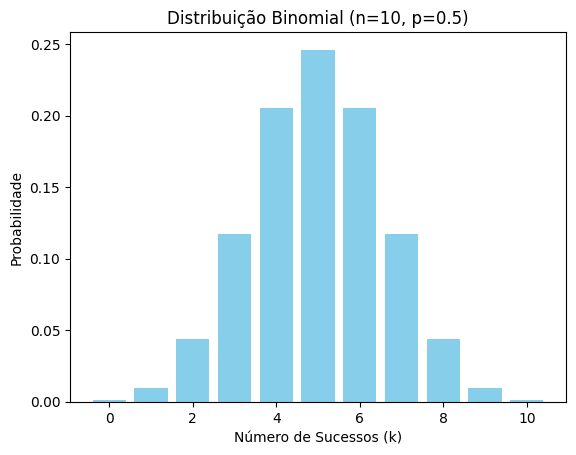

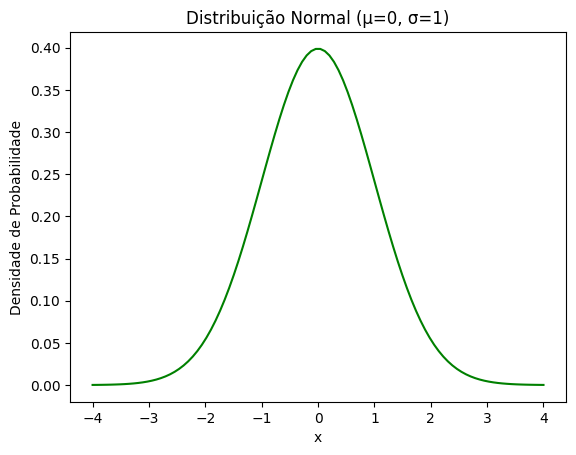

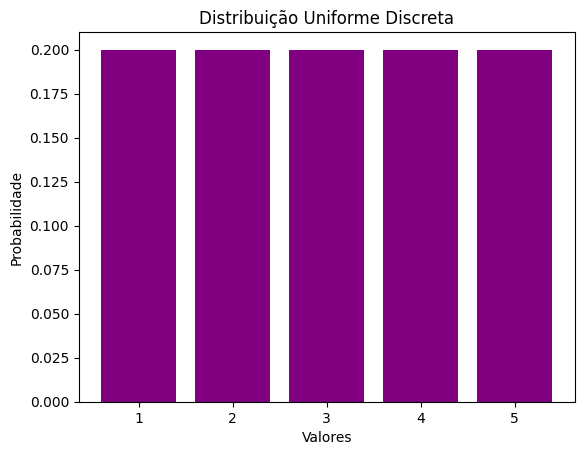

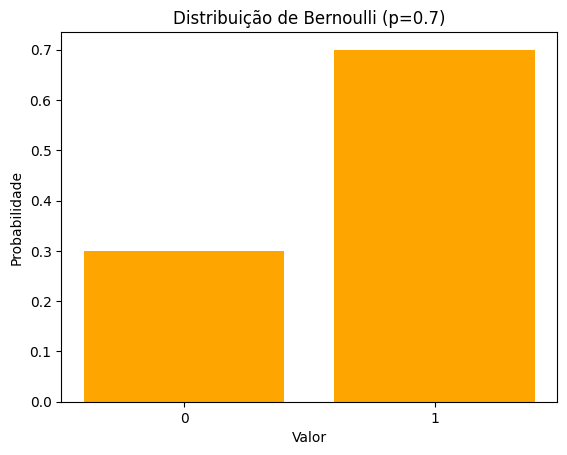

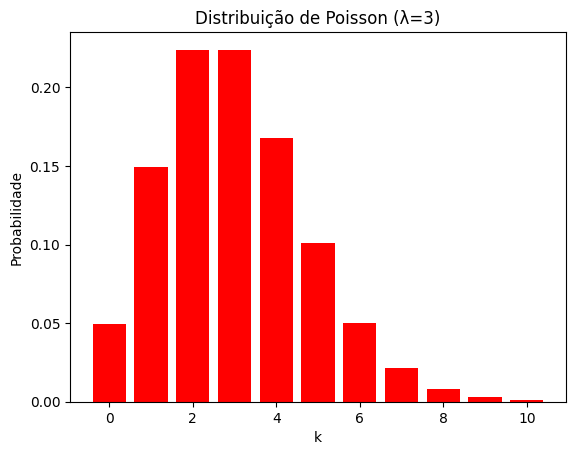

In [41]:
graficos = GraficosDistribuicao()
graficos.plot_distribuicao_binomial(n=10, p=0.5)
graficos.plot_distribuicao_normal(mu=0, sigma=1)
graficos.plot_distribuicao_uniforme_discreta(valores=[1, 2, 3, 4, 5])
graficos.plot_distribuicao_bernoulli(p=0.7)
graficos.plot_distribuicao_poisson(lmbda=3, max_k=10)

In [42]:
dados = [1, 2, 2, 3, 4, 4, 4, 5, 5, 6, 7, 8, 9, 10]
graficos = GraficosEstatisticas()

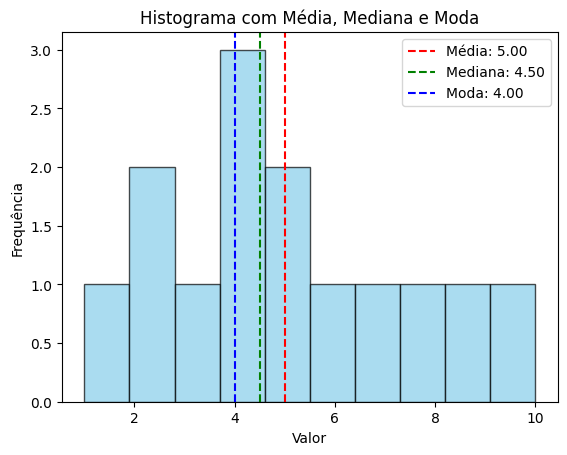

In [43]:
graficos.plot_histograma_com_estatisticas(dados)

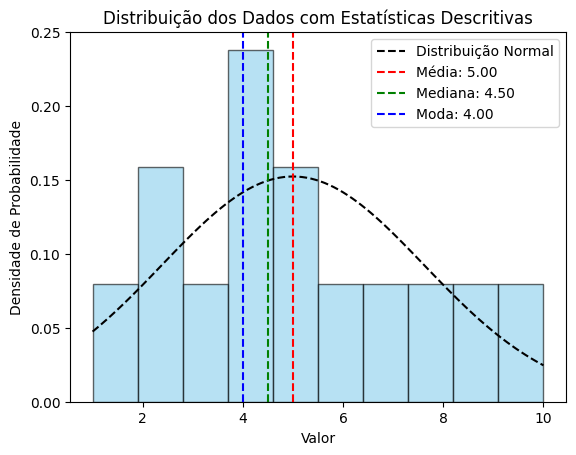

In [44]:
graficos.plot_distribuicao_com_estatisticas(dados)